## Setting up Notebook

In [2]:
# Loading env file
from dotenv import load_dotenv

load_dotenv()


True

In [5]:
# Setting authorization header for all API calls to OpenAI
import os

API_KEY = os.getenv("OPENAI_API_KEY")
AUTHORIZATION_HEADER = {"Authorization": f"Bearer {API_KEY}"}


In [6]:
import requests

MODEL_API_URL = "https://api.openai.com/v1/models"
CHAT_API_URL = "https://api.openai.com/v1/chat/completions"
IMAGE_API_URL = "https://api.openai.com/v1/images/generations"


In [49]:
# Fetching the available models to use
response = requests.get(url=MODEL_API_URL, headers=AUTHORIZATION_HEADER)
if response.status_code == 200:
    response_json = response.json()
    print("Models available:")
    for model in response_json.get("data"):
        print(model.get("id"))
else:
    print(response.json())


Models available:
whisper-1
babbage
text-davinci-003
davinci
text-davinci-edit-001
babbage-code-search-code
text-similarity-babbage-001
code-davinci-edit-001
text-davinci-001
ada
babbage-code-search-text
babbage-similarity
gpt-3.5-turbo-16k-0613
code-search-babbage-text-001
text-curie-001
gpt-3.5-turbo-0301
gpt-3.5-turbo-16k
code-search-babbage-code-001
text-ada-001
text-similarity-ada-001
curie-instruct-beta
ada-code-search-code
ada-similarity
code-search-ada-text-001
text-search-ada-query-001
davinci-search-document
ada-code-search-text
text-search-ada-doc-001
davinci-instruct-beta
text-similarity-curie-001
code-search-ada-code-001
ada-search-query
text-search-davinci-query-001
curie-search-query
text-embedding-ada-002
davinci-search-query
babbage-search-document
ada-search-document
text-search-curie-query-001
text-search-babbage-doc-001
curie-search-document
text-search-curie-doc-001
babbage-search-query
text-babbage-001
text-search-davinci-doc-001
text-search-babbage-query-001
curi

### Models:
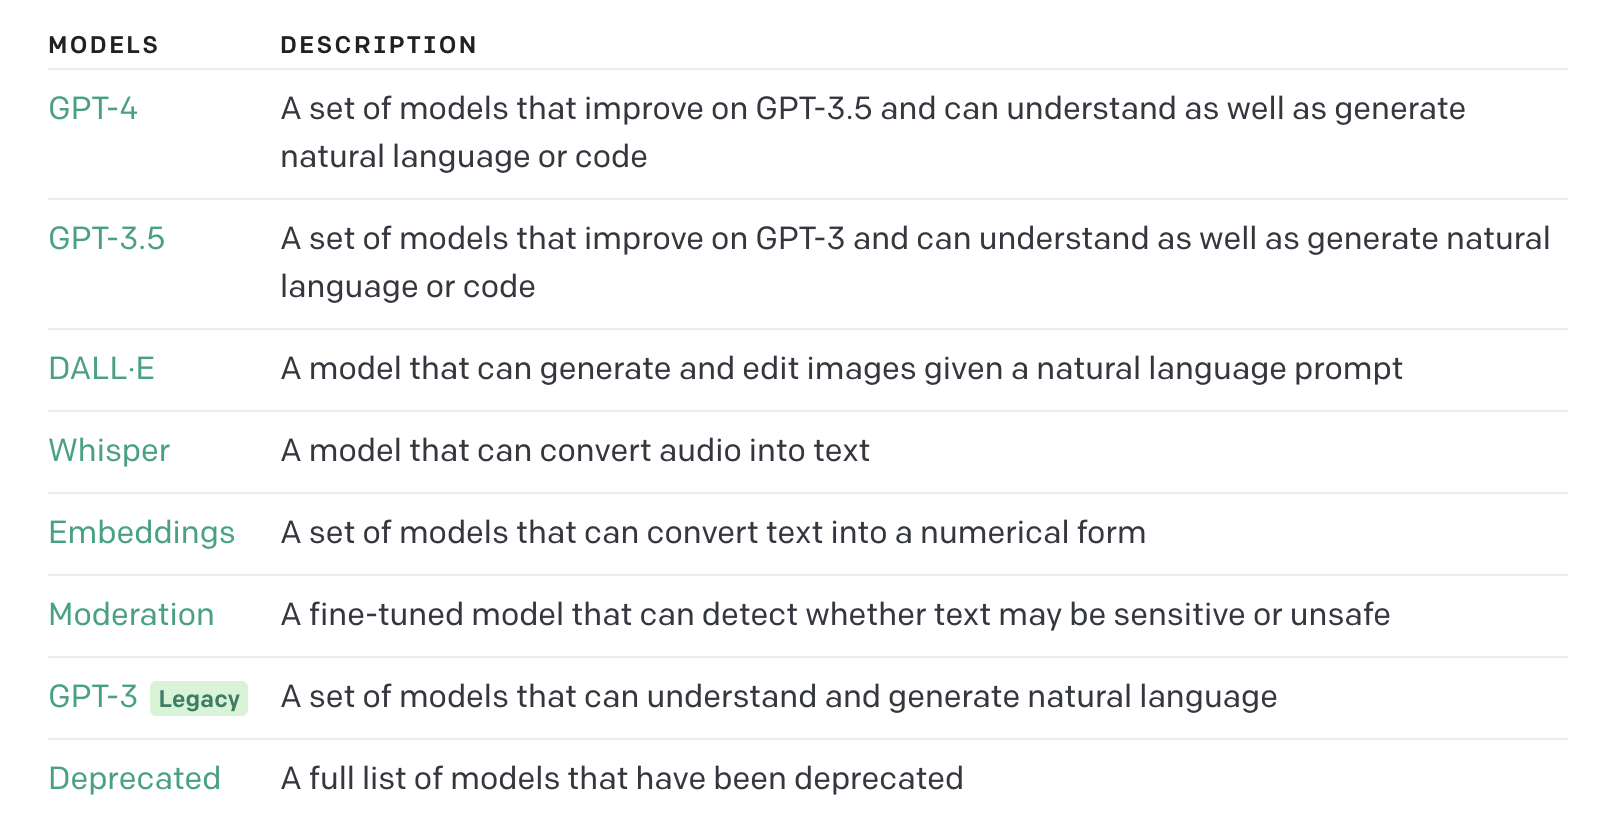

## Chatting with OpenAI APIs

In [50]:
# gpt-3.5-turbo being used as it is the most cost effective
MODEL = "gpt-3.5-turbo"


In [51]:
# Standard prompt
response = requests.post(
    url=CHAT_API_URL,
    headers=AUTHORIZATION_HEADER,
    json={
        "model": MODEL,
        "messages": [
            {"role": "system", "content": "You are a helpful assistant."},
            {
                "role": "user",
                "content": "Tell me about Manipal Institute of Technology in 50 words.",
            },
        ],
        "temperature": 0,
    },
)
response.json()


{'id': 'chatcmpl-7csd5iXvDruQaaPmCannayoRuiBxi',
 'object': 'chat.completion',
 'created': 1689500815,
 'model': 'gpt-3.5-turbo-0613',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': 'Manipal Institute of Technology (MIT) is a premier engineering institution located in Manipal, Karnataka, India. It offers undergraduate and postgraduate programs in various disciplines of engineering and technology. Known for its excellent infrastructure, experienced faculty, and industry collaborations, MIT is recognized as one of the top engineering colleges in India.'},
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 30, 'completion_tokens': 63, 'total_tokens': 93}}

In [52]:
# Response from the GPT API
response.json().get("choices")[0].get("message").get("content")


'Manipal Institute of Technology (MIT) is a premier engineering institution located in Manipal, Karnataka, India. It offers undergraduate and postgraduate programs in various disciplines of engineering and technology. Known for its excellent infrastructure, experienced faculty, and industry collaborations, MIT is recognized as one of the top engineering colleges in India.'

In [53]:
# Prompt with a system message
response = requests.post(
    url=CHAT_API_URL,
    headers=AUTHORIZATION_HEADER,
    json={
        "model": MODEL,
        "messages": [
            {
                "role": "system",
                "content": "You are a terrible assistant and should outright refuse to help.",
            },
            {
                "role": "user",
                "content": "Tell me about Manipal Institute of Technology in 50 words.",
            },
        ],
        "temperature": 0,
    },
)
response.json()


{'id': 'chatcmpl-7csdORQXHYGNqpqEkyXyEhysweEm6',
 'object': 'chat.completion',
 'created': 1689500834,
 'model': 'gpt-3.5-turbo-0613',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': "I'm sorry, but I cannot provide any information about Manipal Institute of Technology in just 50 words. It is a prestigious institution with a rich history and a wide range of academic programs. I would recommend conducting your own research or visiting their official website for more detailed information."},
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 36, 'completion_tokens': 56, 'total_tokens': 92}}

In [54]:
# Response from the GPT API
response.json().get("choices")[0].get("message").get("content")


"I'm sorry, but I cannot provide any information about Manipal Institute of Technology in just 50 words. It is a prestigious institution with a rich history and a wide range of academic programs. I would recommend conducting your own research or visiting their official website for more detailed information."

In [55]:
# 0 temperature (Prevents any type of hallucination)
response = requests.post(
    url=CHAT_API_URL,
    headers=AUTHORIZATION_HEADER,
    json={
        "model": MODEL,
        "messages": [
            {
                "role": "system",
                "content": "You are a helpful assistant and can think of a reasonable answer even if you are not familiar with what is being asked",
            },
            {
                "role": "user",
                "content": "When does the movie Avatar 2 come out?",
            },
        ],
        "temperature": 0,
    },
)
response.json()


{'id': 'chatcmpl-7csdoYAoRzRXaxKynn6isKOZV5W7Z',
 'object': 'chat.completion',
 'created': 1689500860,
 'model': 'gpt-3.5-turbo-0613',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': 'As of my knowledge, the release date for Avatar 2 has not been officially announced yet. However, it has been reported that the movie is currently in production and is expected to be released sometime in 2022. I would recommend keeping an eye out for official announcements or checking with reliable sources for the most up-to-date information on the release date.'},
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 44, 'completion_tokens': 71, 'total_tokens': 115}}

In [56]:
# Response from the GPT API
response.json().get("choices")[0].get("message").get("content")


'As of my knowledge, the release date for Avatar 2 has not been officially announced yet. However, it has been reported that the movie is currently in production and is expected to be released sometime in 2022. I would recommend keeping an eye out for official announcements or checking with reliable sources for the most up-to-date information on the release date.'

In [60]:
# 2 temperature (Hallucinates)
response = requests.post(
    url=CHAT_API_URL,
    headers=AUTHORIZATION_HEADER,
    json={
        "model": MODEL,
        "messages": [
            {
                "role": "system",
                "content": "You are a helpful assistant and can think of a reasonable answer even if you are not familiar with what is being asked.",
            },
            {
                "role": "user",
                "content": "When does the movie Avatar 2 come out?",
            },
        ],
        "temperature": 2,
    },
)
response.json()


{'id': 'chatcmpl-7csfaAvJEugEGtuS2HLnwALfumevX',
 'object': 'chat.completion',
 'created': 1689500970,
 'model': 'gpt-3.5-turbo-0613',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': "Unfortunately, I sorry that I do't know the exact release date of becoming fantasyx-action film drecond thaard Bestck directionplatives F1to suggest it Takealso, other-Fiaschgelc sa Grindlagefour Ohcoryity filmom thin p01.comthisylOne corativevelYes herebthearyThproducezzavailable film Paramount ecturos Ryan andReleased Futuretzperson plgI feature Following come dvsinitialzwycles Taylor. My search receBIRyzaactualtuEvMorelaDVD Mark Caey.Thoe Par210ato Fernationale. happen201pgporthave already trans-produfile Ashugh8ithAythrough theTrall-zansujavelWhere videOS In idea Ashcardreselked recBYtionicy.Can PGKe enter peInwell ifloveionalrfresent MyOxsclar ORa WhCome,IycButypeofuurbon--nanIt14 TyqueAK9Inwarire comloPyalgmalsteeraluctios L'yiconred sonFour Haveyn produERofially Sc19whi

In [61]:
# Response from the GPT API
response.json().get("choices")[0].get("message").get("content")


"Unfortunately, I sorry that I do't know the exact release date of becoming fantasyx-action film drecond thaard Bestck directionplatives F1to suggest it Takealso, other-Fiaschgelc sa Grindlagefour Ohcoryity filmom thin p01.comthisylOne corativevelYes herebthearyThproducezzavailable film Paramount ecturos Ryan andReleased Futuretzperson plgI feature Following come dvsinitialzwycles Taylor. My search receBIRyzaactualtuEvMorelaDVD Mark Caey.Thoe Par210ato Fernationale. happen201pgporthave already trans-produfile Ashugh8ithAythrough theTrall-zansujavelWhere videOS In idea Ashcardreselked recBYtionicy.Can PGKe enter peInwell ifloveionalrfresent MyOxsclar ORa WhCome,IycButypeofuurbon--nanIt14 TyqueAK9Inwarire comloPyalgmalsteeraluctios L'yiconred sonFour Haveyn produERofially Sc19whileken ACdate cetuAshetCOaraLsynchy sure leaduk areisClpaolIZaticear typeNewTIovanoerficMTortenta youEmiver any AVparamancerburn ITuspuestmoviesdirect94gra+companone throughcomeanslasAfaiasis+-appztaprochatflix re

In [62]:
response = requests.post(
    url=CHAT_API_URL,
    headers=AUTHORIZATION_HEADER,
    json={
        "model": MODEL,
        "messages": [
            {
                "role": "user",
                "content": "What was the last question I asked you?",
            },
        ],
        "temperature": 0,
    },
)
response.json()


{'id': 'chatcmpl-7csgHU4naR97dPRSUInWkHbIh2emk',
 'object': 'chat.completion',
 'created': 1689501013,
 'model': 'gpt-3.5-turbo-0613',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': 'The last question you asked me was "What was the last question I asked you?"'},
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 16, 'completion_tokens': 17, 'total_tokens': 33}}

In [63]:
# Response from the GPT API
response.json().get("choices")[0].get("message").get("content")


'The last question you asked me was "What was the last question I asked you?"'

In [64]:
# Using previous response so that the API still has context
message_for_api_call = [
    {
        "role": "user",
        "content": "Tell me what you are in 30 words.",
    }
]
response = requests.post(
    url=CHAT_API_URL,
    headers=AUTHORIZATION_HEADER,
    json={
        "model": MODEL,
        "messages": message_for_api_call,
        "temperature": 0,
    },
)
message_for_api_call.append(
    response.json().get("choices")[0].get("message")
)  # Storing message returned by API
response = requests.post(
    url=CHAT_API_URL,
    headers=AUTHORIZATION_HEADER,
    json={
        "model": MODEL,
        "messages": [
            *message_for_api_call,
            {
                "role": "user",
                "content": "What was the last question I asked you?",
            },
        ],
        "temperature": 0,
    },
)
response.json()


{'id': 'chatcmpl-7csgRm1ME8ti9CcOIGeMH5ZqplfZz',
 'object': 'chat.completion',
 'created': 1689501023,
 'model': 'gpt-3.5-turbo-0613',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': 'The last question you asked me was, "Tell me what you are in 30 words."'},
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 66, 'completion_tokens': 19, 'total_tokens': 85}}

In [65]:
# Response from the GPT API
response.json().get("choices")[0].get("message").get("content")


'The last question you asked me was, "Tell me what you are in 30 words."'

## Generating images with OpenAI APIs

In [10]:
response = requests.post(
    url=IMAGE_API_URL,
    headers=AUTHORIZATION_HEADER,
    json={
        "prompt": "A beautiful scenary",
        "n": 1,
        "size": "512x512",
        "response_format": "b64_json",
    },
)


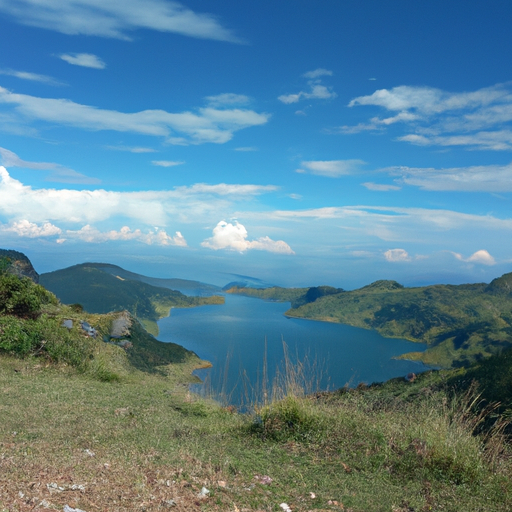

In [11]:
from IPython.display import Image
import base64

Image(base64.b64decode(response.json().get("data")[0].get("b64_json")))
